<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/Udesha-/LSTM_Multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler , StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] =[10,8]
mpl.rcParams['axes.grid']= False

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/August-2021%20Mannar%20Wind%20Data1.csv')
df = df.rename(columns = {'TimeStamp': 'Date & Time', 'Average  Wind Speed(m/s)': 'Wind Speed (m/s)', 'Average  Wind Dirction(deg)':'Wind Direction(deg)','Average Active Power(MW)':'Active Power(MW)'}, inplace = False)
df=df[['Date & Time','Active Power(MW)','Wind Speed (m/s)','Wind Direction(deg)']]
# aaa=df.head(471)
#df=df.tail(3000)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date & Time          4409 non-null   object 
 1   Active Power(MW)     4409 non-null   float64
 2   Wind Speed (m/s)     4409 non-null   float64
 3   Wind Direction(deg)  4409 non-null   float64
dtypes: float64(3), object(1)
memory usage: 137.9+ KB


In [4]:
df['Date & Time'] = pd.to_datetime(df['Date & Time'], format="%m/%d/%Y %H:%M")

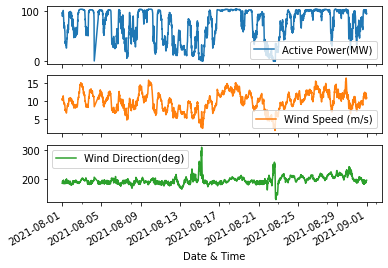

In [5]:
df.set_index('Date & Time')[['Active Power(MW)','Wind Speed (m/s)','Wind Direction(deg)']].plot(subplots=True)
testset=df.tail(862)

In [6]:
df_input=df[['Active Power(MW)','Wind Speed (m/s)','Wind Direction(deg)']]
df_input


,Active Power(MW),Wind Speed (m/s),Wind Direction(deg)
0,95.84,10.66,186.92
1,96.03,10.71,188.15
2,93.72,10.53,188.78
3,88.84,10.20,189.80
4,90.97,10.34,193.00
...,...,...,...
4404,100.45,11.62,195.08
4405,98.01,11.16,196.36
4406,93.11,10.66,198.02
4407,93.68,10.90,196.96


In [7]:
df_input.describe()

,Active Power(MW),Wind Speed (m/s),Wind Direction(deg)
count,4409.000000,4409.000000,4409.000000
mean,72.599642,9.954030,197.371971
std,31.062804,2.587067,14.207014
min,-0.760000,1.810000,130.840000
25%,48.450000,8.220000,189.000000
50%,84.460000,10.060000,194.740000
75%,100.990000,11.880000,203.610000
max,103.420000,16.450000,311.140000


In [8]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)

In [9]:
data_scaled

array([[0.92724131, 0.6045082 , 0.31103716],
       [0.92906508, 0.6079235 , 0.31785912],
       [0.90689192, 0.59562842, 0.3213533 ],
       ...,
       [0.90103667, 0.6045082 , 0.37260122],
       [0.90650797, 0.62090164, 0.36672213],
       [0.90737186, 0.62431694, 0.37071547]])

In [10]:
features=data_scaled
target=data_scaled[:,0]
#target

In [11]:
TimeseriesGenerator(features,target,length=5,sampling_rate=1,batch_size=1)[0]

(array([[[0.92724131, 0.6045082 , 0.31103716],
         [0.92906508, 0.6079235 , 0.31785912],
         [0.90689192, 0.59562842, 0.3213533 ],
         [0.86004991, 0.57308743, 0.32701054],
         [0.8804953 , 0.58265027, 0.34475874]]]), array([0.89969284]))

In [12]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.20,random_state=123,shuffle=False)

In [13]:
x_train.shape

(3527, 3)

In [14]:
x_test.shape

(882, 3)

In [15]:
win_length=20
batch_size=16
num_feature=3
train_generator = TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [16]:
#train_generator[0]

In [17]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64,input_shape=(win_length,num_feature),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.6))
model.add(tf.keras.layers.LSTM(32,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.6))
model.add(tf.keras.layers.Dropout(0.1))
# model.add(tf.keras.layers.LSTM(64,return_sequences=True))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.6))
# model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.LSTM(16,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            17408     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 20, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 32)            12416     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20, 32)            0         
                                                                 
 dropout (Dropout)           (None, 20, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2,mode="min")
model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])
history=model.fit_generator(train_generator,epochs=50,validation_data=test_generator,shuffle=False,callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


220/220 [==============================] - 14s 38ms/step - loss: 0.0390 - mean_absolute_error: 0.1508 - val_loss: 0.0133 - val_mean_absolute_error: 0.0893
Epoch 2/50
220/220 [==============================] - 7s 32ms/step - loss: 0.0217 - mean_absolute_error: 0.1150 - val_loss: 0.0083 - val_mean_absolute_error: 0.0540
Epoch 3/50
220/220 [==============================] - 7s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.1015 - val_loss: 0.0062 - val_mean_absolute_error: 0.0501
Epoch 4/50
220/220 [==============================] - 7s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0918 - val_loss: 0.0054 - val_mean_absolute_error: 0.0453
Epoch 5/50
220/220 [==============================] - 7s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0855 - val_loss: 0.0048 - val_mean_absolute_error: 0.0440
Epoch 6/50
220/220 [==============================] - 7s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0801 - val_loss: 0.0044 - val_mean_absolute_error: 0.0431
Epoch 7/50
220/220 [

In [20]:
model.evaluate_generator(test_generator,verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.0023313250858336687, 0.04060715064406395]

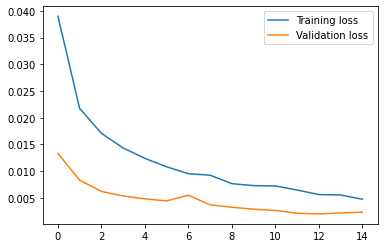

In [21]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [22]:
predictions=model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [23]:
predictions.shape[0]

862

In [24]:
#predictions

In [25]:
#y_test

In [26]:
x_test

array([[0.98406604, 0.75      , 0.34875208],
       [0.98521789, 0.75204918, 0.35047144],
       [0.98349011, 0.73087432, 0.35812535],
       ...,
       [0.90103667, 0.6045082 , 0.37260122],
       [0.90650797, 0.62090164, 0.36672213],
       [0.90737186, 0.62431694, 0.37071547]])

In [27]:
x_test[:,1:][win_length:]

array([[0.74453552, 0.37881309],
       [0.74453552, 0.37648364],
       [0.77117486, 0.37542984],
       ...,
       [0.6045082 , 0.37260122],
       [0.62090164, 0.36672213],
       [0.62431694, 0.37071547]])

In [28]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [29]:
df_pred

,0,0,1
0,0.956690,0.744536,0.378813
1,0.950490,0.744536,0.376484
2,0.946001,0.771175,0.375430
3,0.935046,0.757514,0.381253
4,0.926752,0.748634,0.387909
...,...,...,...
857,0.953586,0.670082,0.356295
858,0.934227,0.638661,0.363394
859,0.906521,0.604508,0.372601
860,0.866873,0.620902,0.366722


In [30]:
rev_trans=scaler.inverse_transform(df_pred)

In [31]:
rev_trans

array([[ 98.90799664,  12.71      , 199.14      ],
       [ 98.26201072,  12.71      , 198.72      ],
       [ 97.79442694,  13.1       , 198.53      ],
       ...,
       [ 93.68132906,  10.66      , 198.02      ],
       [ 89.55085668,  10.9       , 196.96      ],
       [ 90.04278213,  10.95      , 197.68      ]])

In [32]:
df_final=df_input[predictions.shape[0]*-1:]

In [33]:
df_final.count()

Active Power(MW)       862
Wind Speed (m/s)       862
Wind Direction(deg)    862
dtype: int64

In [34]:
df_final["Pred_Wind_Power(MW)"]=rev_trans[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_print=df_final[['Active Power(MW)',"Pred_Wind_Power(MW)"]]

In [41]:
df_print

,Active Power(MW),Pred_Wind_Power(MW)
3547,101.77,98.907997
3548,101.12,98.262011
3549,98.52,97.794427
3550,98.48,96.653088
3551,98.84,95.788996
...,...,...
4404,100.45,98.584538
4405,98.01,96.567793
4406,93.11,93.681329
4407,93.68,89.550857


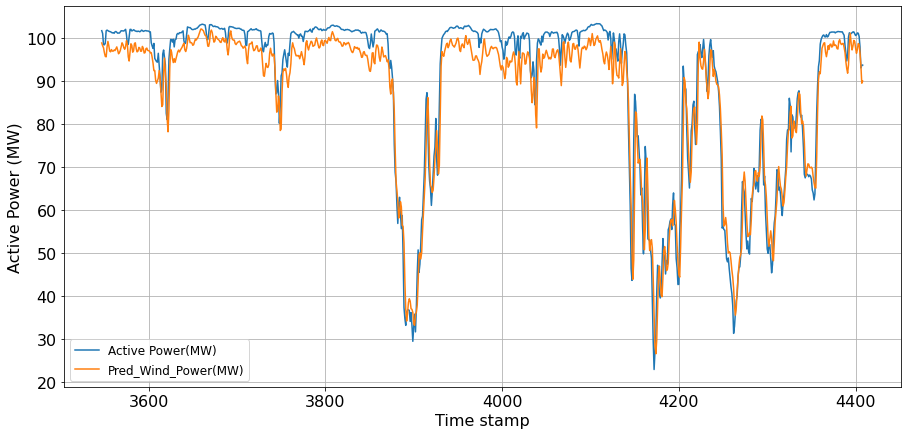

In [42]:

df_final[['Active Power(MW)','Pred_Wind_Power(MW)']].plot(fontsize=16,figsize=(15,7))
plt.ylabel("Active Power (MW)", fontsize=16)
plt.xlabel("Time stamp", fontsize=16)
plt.grid()
plt.legend(loc='lower left',prop={"size":12})
# plt.title('Actual vs Predicted',fontname="Meiryo", fontsize=20,)


In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np
import math
MSE=mean_squared_error(df_final['Active Power(MW)'],df_final['Pred_Wind_Power(MW)'])
RMSE = math.sqrt(MSE)
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

actual = df_final['Active Power(MW)']
pred = df_final['Pred_Wind_Power(MW)']

MAPE=mape(actual, pred)

In [39]:
print('RMSE = '+ str(RMSE))
print('MAPE = '+ str(MAPE))

RMSE = 5.030205877208116
MAPE = 5.290127415504803
